In [ ]:
!pip install opencv-python==4.4.0.42 opencv-contrib-python==4.4.0.42

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 MB 9.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

1. С помощью библиотеки OpenCV считайте изображение.

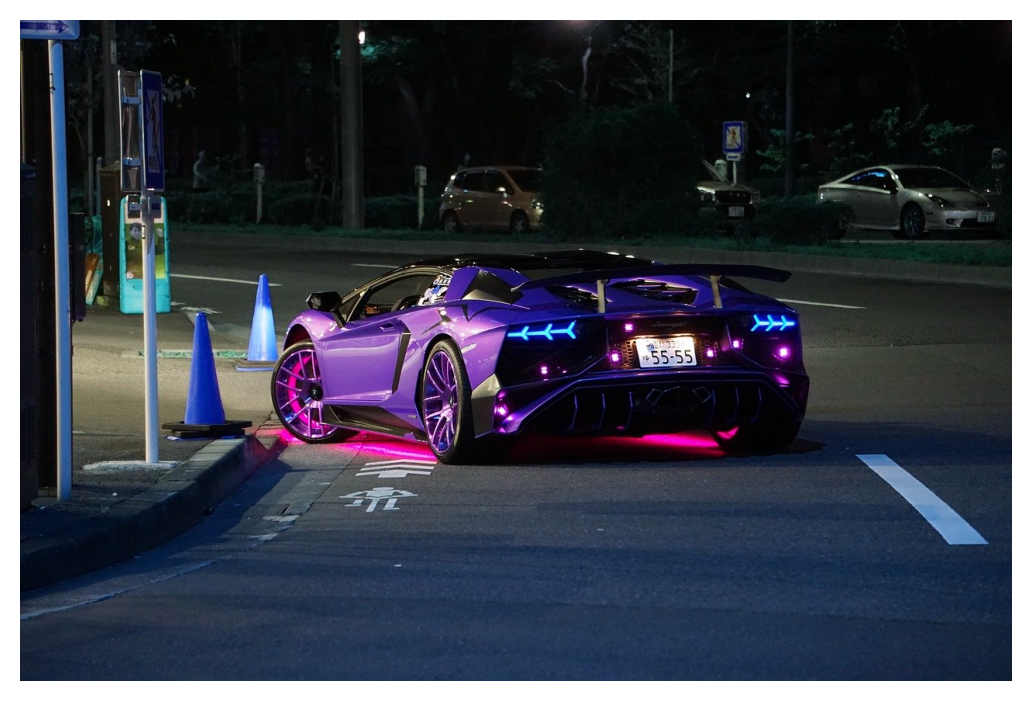

In [ ]:
img_1 = cv2.imread('1.jpg')
plt.axis('off')
plt.imshow(img_1)

2. Выделите подматрицу пикселей, находящихся на пересечении строк в диапазоне от 353 до 503 включительно, и столбцов в диапазоне от 550 до 695 включительно, матричного представления изображения. Сохраните кадрированное изображение. (т.е. [353:503, 550:695]).

Высота:  150
Ширина:  145


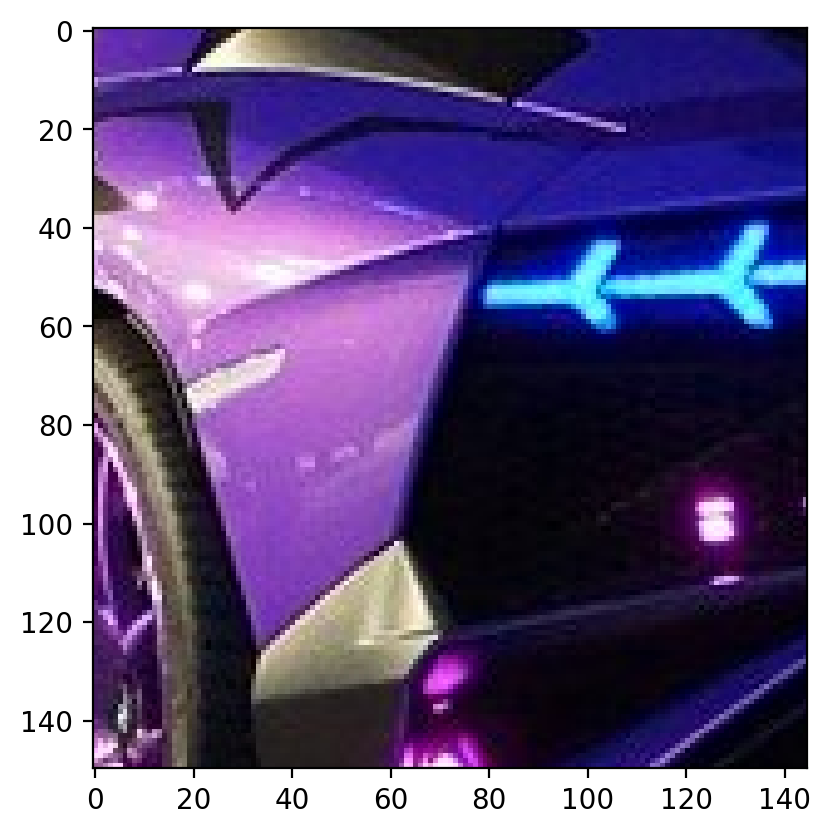

In [ ]:
crop_img_1 = img_1[353:503, 550:695]
h, w, c = crop_img_1.shape
plt.imshow(crop_img_1)
print('Высота: ', h)
print('Ширина: ', w)

4. Используйте дескриптор SIFT для нахождения одного изображения в другом
(кадрированного на исходном).
Не забудьте перевести их в градации серого.

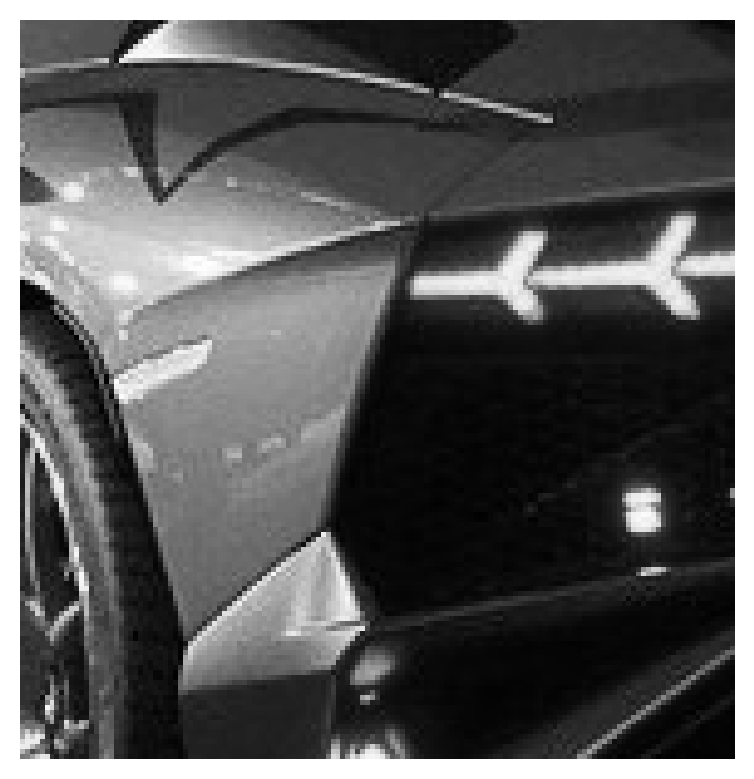

In [ ]:
crop_img_gray = cv2.cvtColor(crop_img_1, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(crop_img_gray, cmap='gray')

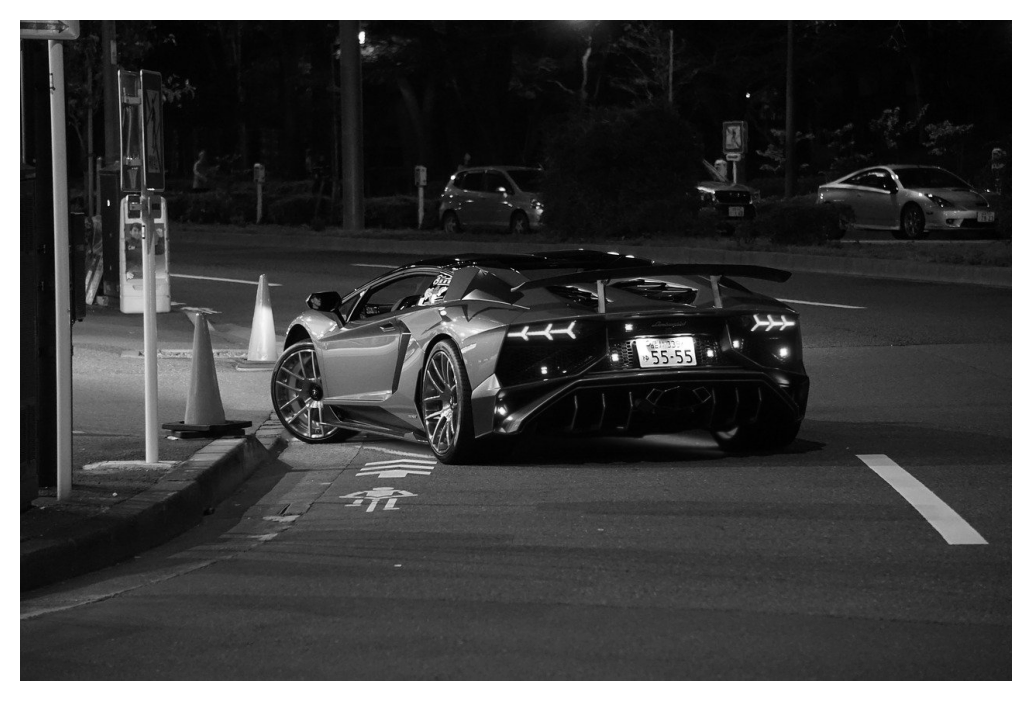

In [ ]:
img_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(img_gray, cmap='gray')

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(crop_img_gray, None) 
kp2, des2 = sift.detectAndCompute(img_gray, None)

bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
#crossCheck=false - совпадения вида один ко многим, crossCheck=true - совпадения вида один к одному
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance) 
print('Количество совпадений ', len(matches))
for i in range(0,5): #выведем первые 3 
  print('Расстояние ',matches[i].distance,'Индекс 1 ',matches[i].trainIdx,'Индекс 2 ', matches[i].queryIdx)

Количество совпадений  99
Расстояние  0.0 Индекс 1  1324 Индекс 2  16
Расстояние  0.0 Индекс 1  1330 Индекс 2  18
Расстояние  0.0 Индекс 1  1331 Индекс 2  19
Расстояние  0.0 Индекс 1  1334 Индекс 2  21
Расстояние  0.0 Индекс 1  1335 Индекс 2  22


In [ ]:
print('Расстояние ',matches[0].distance,'Индекс 1 ',matches[0].trainIdx,'Индекс 2 ', matches[0].queryIdx)

Расстояние  0.0 Индекс 1  1324 Индекс 2  16


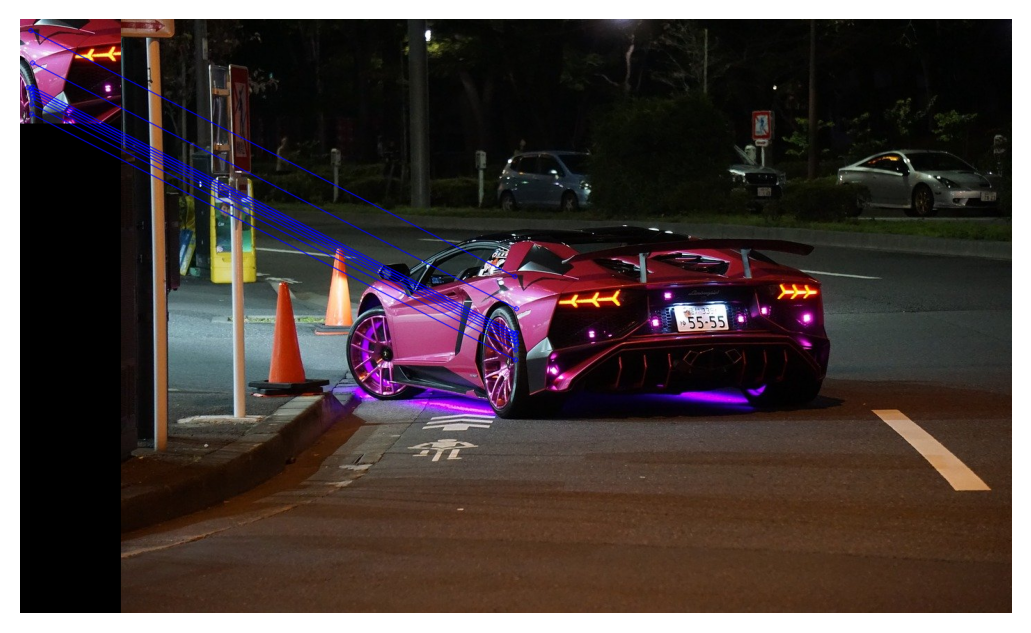

In [ ]:
matching_result = cv2.drawMatches(crop_img_1, kp1, img_1, kp2, matches[:10], None, [255,0,0], flags=2)
mpl.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))

5. Отсортируйте совпадения от лучшего к худшему в зависимости от аттрибута distance (чем меньше, тем лучше). Определите координаты нулевой ключевой точки.
6. Определите интенсивность каналов B,G,R для полученной ключевой точки:

x:  561
y:  451
201 , 74 , 119


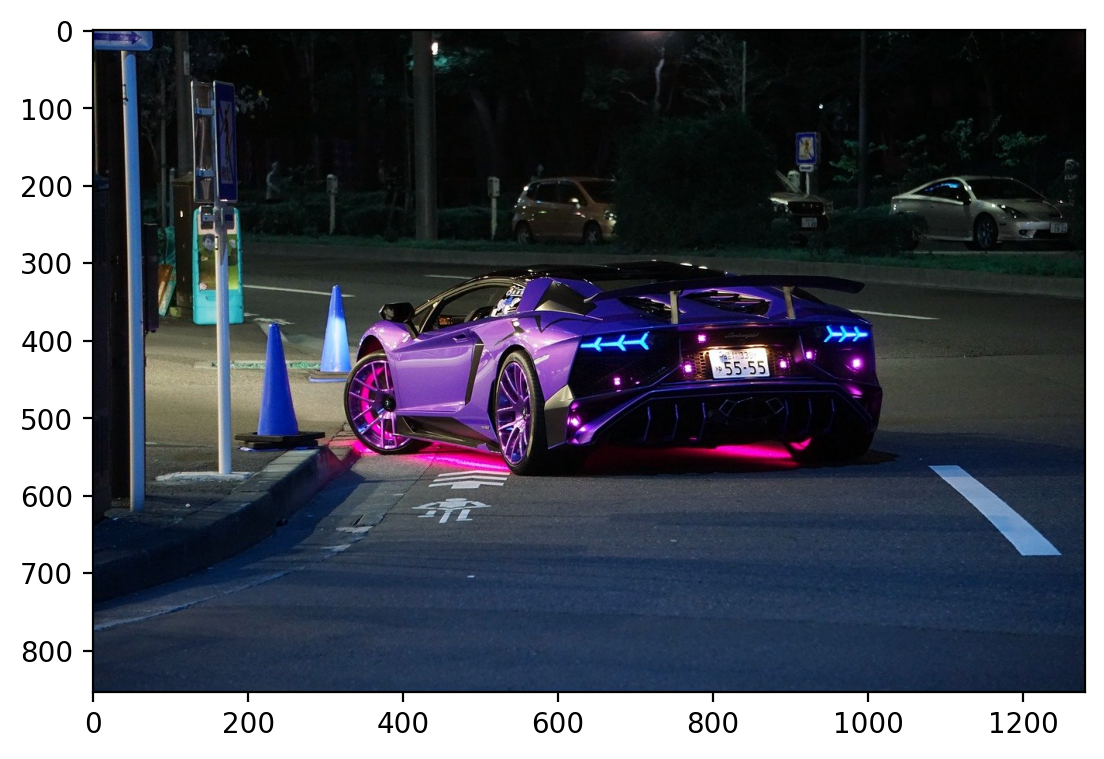

In [ ]:
x = np.float32([kp2[matches[0].trainIdx].pt])[0][0]
y = np.float32([kp2[matches[0].trainIdx].pt])[0][1]
print('x: ', round(x))
print('y: ', round(y))

B, G, R = img_1[x][y]
print(B, ',', G, ',', R)
plt.imshow(img_1)